<a href="https://colab.research.google.com/github/srirampandi99/CODSOFT/blob/main/SMSspamdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
file_id = "1zmZ0gtozjYmvIfy_9K1Z6QUErQKdMtYO"
url = f"https://drive.google.com/uc?id={file_id}"

# Define the local file path where you want to save the dataset
output_path = "/content/dataset.csv"

# Download the dataset using gdown
import gdown
gdown.download(url, output_path, quiet=False)
encoding = "ISO-8859-1"

# Now you can read the dataset using pandas or any other relevant library
import numpy as np
import pandas as pd
df = pd.read_csv(output_path,encoding=encoding)

Downloading...
From: https://drive.google.com/uc?id=1zmZ0gtozjYmvIfy_9K1Z6QUErQKdMtYO
To: /content/dataset.csv
100%|██████████| 504k/504k [00:00<00:00, 39.6MB/s]


1. Data Cleaning

In [2]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2510,ham,Yunny i'm walking in citylink now Ì_ faster co...,NaN,NaN,NaN
4483,ham,Shopping? Eh ger i toking abt syd leh...Haha,NaN,NaN,NaN
3803,ham,"No dude, its not fake..my frnds got money, tht...",NaN,NaN,NaN
5262,ham,Did you see that film:),NaN,NaN,NaN
4486,ham,Miss call miss call khelate kintu opponenter m...,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)

,v1,v2
3930,ham,Nooooooo I'm gonna be bored to death all day. ...
1065,ham,No my mum went 2 dentist.
943,ham,And also I've sorta blown him off a couple tim...
1822,ham,If you're thinking of lifting me one then no.
24,ham,Ffffffffff. Alright no way I can meet up with ...


In [6]:
# renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
410,ham,Come by our room at some point so we can iron ...
744,ham,Men like shorter ladies. Gaze up into his eyes.
2326,ham,The Xmas story is peace.. The Xmas msg is love...
2830,ham,Thanx 4 sending me home...
107,ham,How would my ip address test that considering ...


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
df['target'] = encoder.fit_transform(df['target'])

In [9]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
# check for duplicate values
df.duplicated().sum()

403

In [12]:
#removing duplicates
df = df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

0

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


2. Exploratory Data Analysis

In [15]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

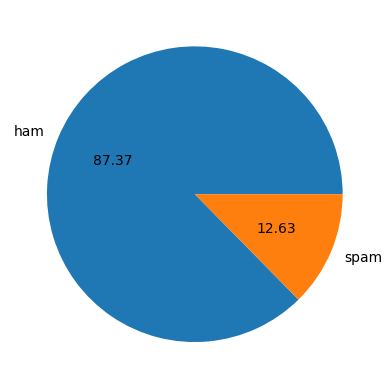

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
x_test,x_train ,y_test,y_train = train_test_split(df.text,df.target,test_size= 0.25)

## count vectorizer is a techneque which is helpful to conert the words into binary foermat .

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
x_new = cv.fit_transform(x_train,y_train)
x_new.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

##Grid search cv methos is maily used  to select the best model for the training data.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

In [20]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the models and their parameter grids
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20]
        }
    },
    'svm': {
        'model': SVC(),
        'params': {
            'C': [1, 10, 100],
            'kernel': ['linear', 'rbf']
        }
    },
    'naive_bayes': {
        'model': MultinomialNB(),
        'params': {}
    },
    'logistic_regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
        }
    }
}

best_model = None
best_accuracy = 0

# Loop through the models and perform GridSearchCV
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5)
    clf.fit(x_new, y_train)
    y_pred = clf.predict(cv.transform(x_test))
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model_name

print(f"Best Model: {best_model}")
print(f"Best Accuracy: {best_accuracy}")


Best Model: naive_bayes
Best Accuracy: 0.9770381836945304


In [21]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_new,y_train)

MultinomialNB()

In [22]:
emails = [
    'heymohan can we get together?',
    'upto 20% dicount on parking . exclusive offer '
]
email_count = cv.transform(emails)
model.predict(email_count)


array([0, 1])

In [23]:
c= cv.transform(x_test)
model.predict(c)


array([0, 0, 0, ..., 0, 0, 0])

# HERE CONVERTING INTO MATRIX GIVING SOME INCONENINT . SO LETS PERFORM SOME PIPPING OPERATION

### pipeline is a method in sklearn  . A data pipeline is a set of interconnected components that process data as it flows through the system. These components can include data sources, write-down functions, transformation functions, and other data processing operations, such as validation and cleaning.

In [24]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])
clf.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [25]:
clf.score(x_test,y_test)

0.9770381836945304

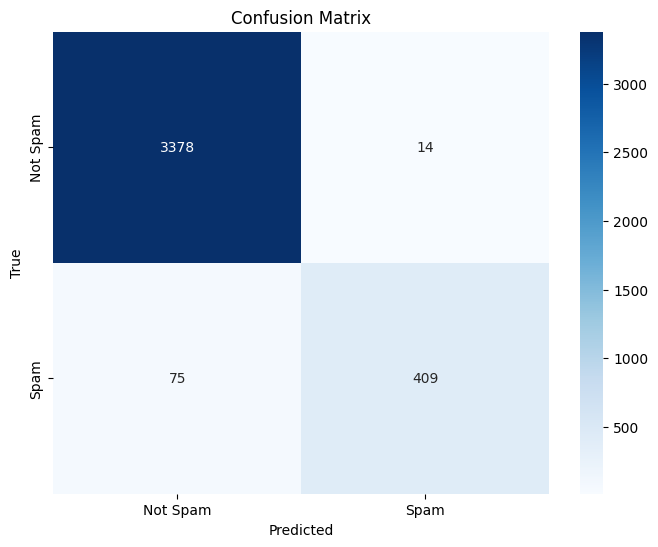

In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


model.fit(x_new, y_train)

y_pred = model.predict(c)

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


from above matrix we can conclude that . out of 3389 not spam sample data the model predicted that the data is not spam 3381 times correctly and 8 times in correct.
Like wise out of 487 spam samples of data the model predicted that the data is spam 408 correctly and 79 times wrong .